# DATA COLLECTION FROM EXCEL SHEET

In [6]:
# importing important libraries for cleaning and visualizing the data  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# lOADING DATA
df = pd.read_excel(r"C:\Users\easil\OneDrive\Desktop\CAR DETAILS FROM CAR DEKHO.xlsx")

# CLEANING DATA

In [9]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
df.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [11]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [14]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [15]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [16]:
df['name'].nunique()

1491

In [18]:
df['year'].nunique()

27

In [19]:
df['selling_price'].nunique()

445

In [20]:
df['km_driven'].nunique()

770

In [21]:
df['fuel'].nunique()

5

In [22]:
df['seller_type'].nunique()

3

In [23]:
df['transmission'].nunique()

2

In [24]:
df['owner'].nunique()

5

In [25]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [26]:
df.isnull().sum().sum()

0

In [31]:
df.shape

(4340, 8)

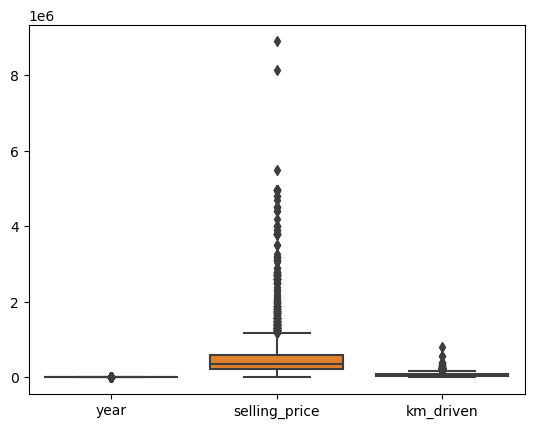

In [29]:
# checking outliers
sns.boxplot(data=df)
plt.show()

In [30]:
#There are some outliers viewed in 'selling_price' columns 


In [32]:
#removing outliers by IQR method
Q1 = df.selling_price.quantile(0.25)
Q3 = df.selling_price.quantile(0.75)

In [33]:
IQR = Q3 - Q1

In [34]:
upper_outliers = Q3 + 1.5*IQR
lower_outliers = Q1 - 1.5*IQR

In [35]:
upper_outliers,lower_outliers

(1186875.375, -378125.625)

In [52]:
  df2 =  df[df.selling_price<upper_outliers]

In [53]:
df.shape

(4340, 8)

In [54]:
df2.shape

(4069, 8)

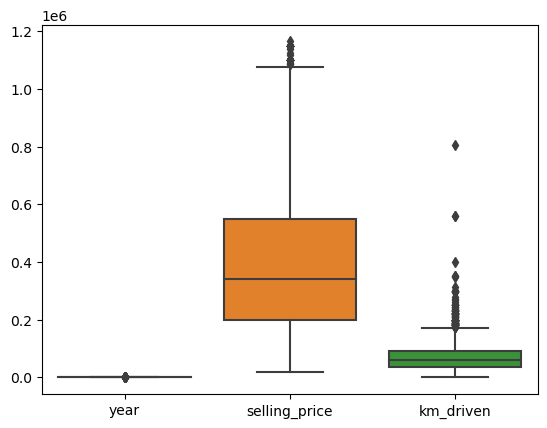

In [55]:
sns.boxplot(data=df2)
plt.show()

In [56]:
# outliers removed

In [57]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [58]:
#ML PIPELINE
 # independent variable
X = df2.drop('selling_price',axis=1)
 # dependent variable
y = df2['selling_price']

In [59]:
X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [60]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1

LinearRegression()

In [62]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile,chi2

In [64]:
numeric_features = ["year", "km_driven"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["name", "fuel", "seller_type","transmission","owner"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [65]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model1)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("model score:" , clf.score(X_test, y_test))

model score: 0.6937316154998514


In [66]:
from sklearn.metrics import r2_score,mean_absolute_error

In [67]:
r2_score(y_test,y_pred)

0.6937316154998514

In [68]:
mean_absolute_error(y_test,y_pred)

95505.4502768291

In [69]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'km_driven']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                      

In [70]:
import pickle

In [71]:
pickle.dump(clf,open('LinearRegressionModel.pkl','wb'))

In [72]:
pwd

'C:\\Users\\easil\\project_cardekho_model'